In [91]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
data = pd.read_json('logins.json')

In [93]:
data2 = pd.read_json('ultimate_data_challenge.json')

## Login Time Series Dataset

-Aggregate these login counts based on 15­minute time intervals

-visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. 

-Please report/illustrate important features of the demand,
such as daily cycles. 

-If there are data quality issues, please report them.

In [94]:
print(data.shape)
data

(93142, 1)


,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


There are 93,000 rows (timestamps), with one column (login times)

-the dates begin in 1/1/70 and end on 4/13/70

In [95]:
data.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


## Aggegrate Login Times into 15 Minute Intervals

In [96]:
# resampling for 15 minute intervals

data_agg15 = data.resample('15min', on='login_time').count()
data_agg15.head()

,login_time
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


### 15 Minute Increments, Full Data Time Series (Jan-April)

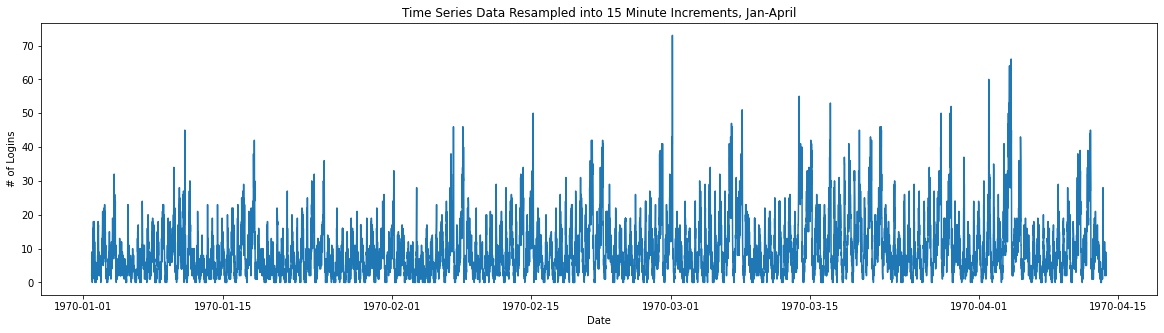

In [97]:
plt.figure(figsize=(20,5))
plt.plot(data_agg15.index,data_agg15.login_time)
plt.title('Time Series Data Resampled into 15 Minute Increments, Jan-April')
plt.xlabel('Date')
plt.ylabel('# of Logins')
plt.show()

### 15 Minute Increments, 1 Month (January)

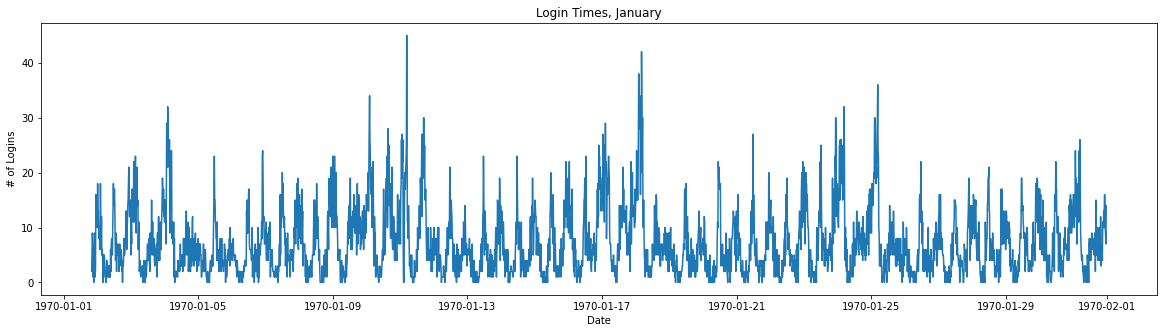

In [98]:
plt.figure(figsize=(20,5))
plt.plot(data_agg15.loc[:'1970-1'].index, data_agg15.loc[:'1970-1'].login_time)
plt.title('Login Times, January')
plt.xlabel('Date')
plt.ylabel('# of Logins')
plt.show()

### 15 Minute Increments, 1 Week (January)

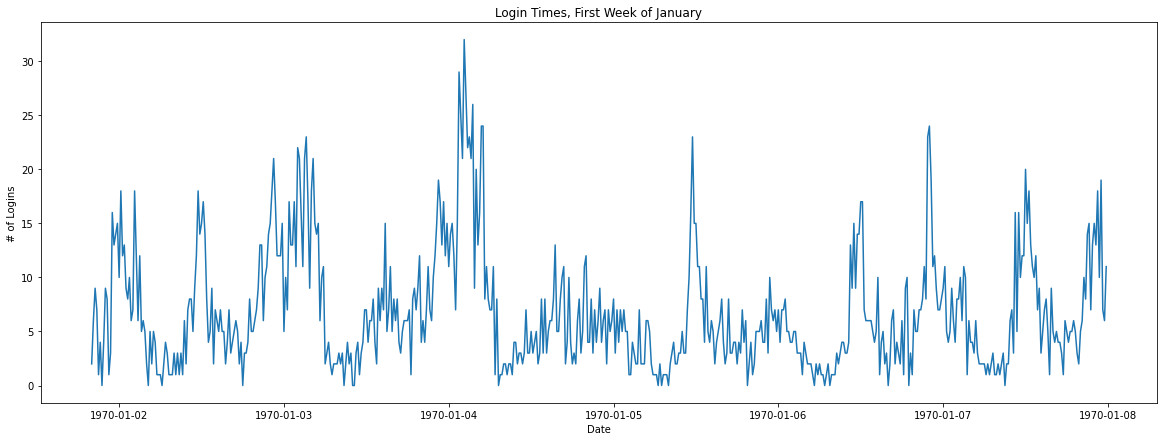

In [99]:
# login times per 15 Minute Increment (One Week)

plt.figure(figsize=(20,7))
plt.plot(data_agg15.loc[:'1970-1-7'].index, data_agg15.loc[:'1970-1-7'].login_time)
plt.title('Login Times, First Week of January')
plt.xlabel('Date')
plt.ylabel('# of Logins')
plt.show()

### 15 Minute Increments, 1 Day (January)

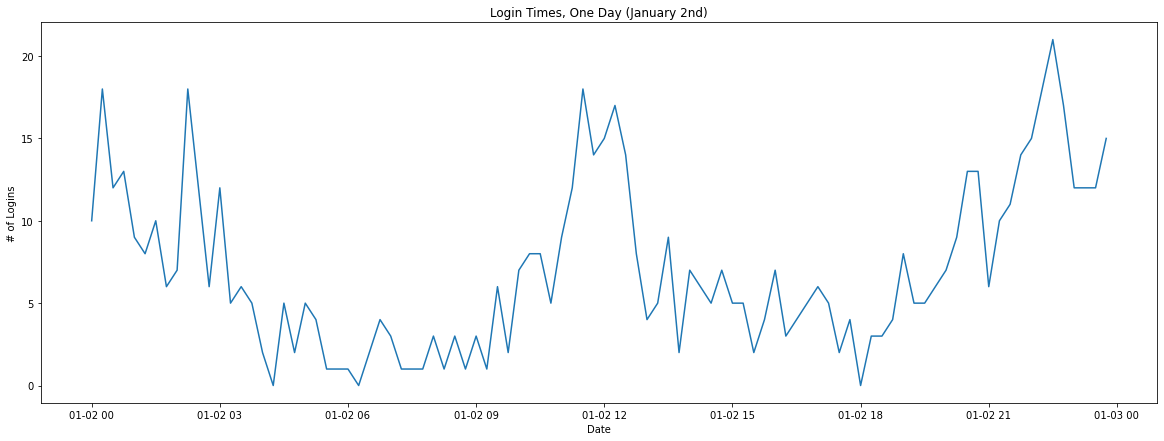

In [100]:
# login times per 15 Minute Increment (One Day)

plt.figure(figsize=(20,7))
plt.plot(data_agg15.loc['1970-1-2':'1970-1-2'].index, data_agg15.loc['1970-1-2':'1970-1-2'].login_time)
plt.title('Login Times, One Day (January 2nd)')
plt.xlabel('Date')
plt.ylabel('# of Logins')
plt.show()


### Data Re-sampled, 1 Hour Increments in January

In [101]:
# data re-sampled based on an hour

data_agg1h = data.resample('H', on='login_time').count()

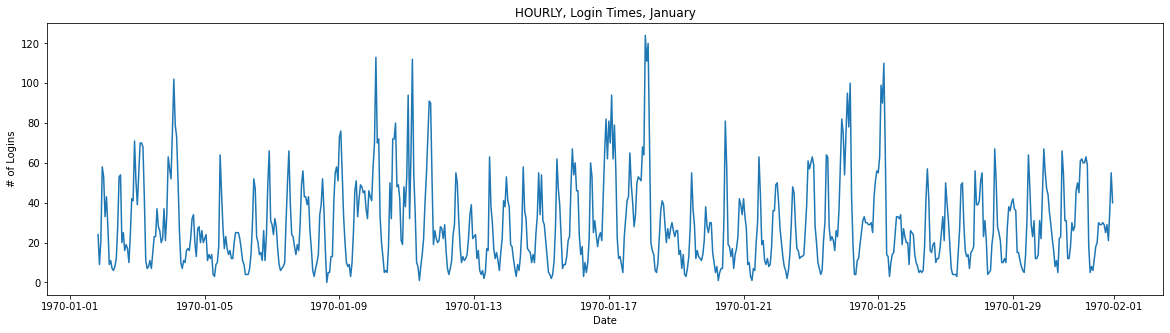

In [102]:
# Login Times per 1 hour increments (One Month)

plt.figure(figsize=(20,5))
plt.plot(data_agg1h.loc[:'1970-1'].index, data_agg1h.loc[:'1970-1'].login_time)
plt.title('HOURLY, Login Times, January')
plt.xlabel('Date')
plt.ylabel('# of Logins')
plt.show()

### 1 Hour Increments, One Day 

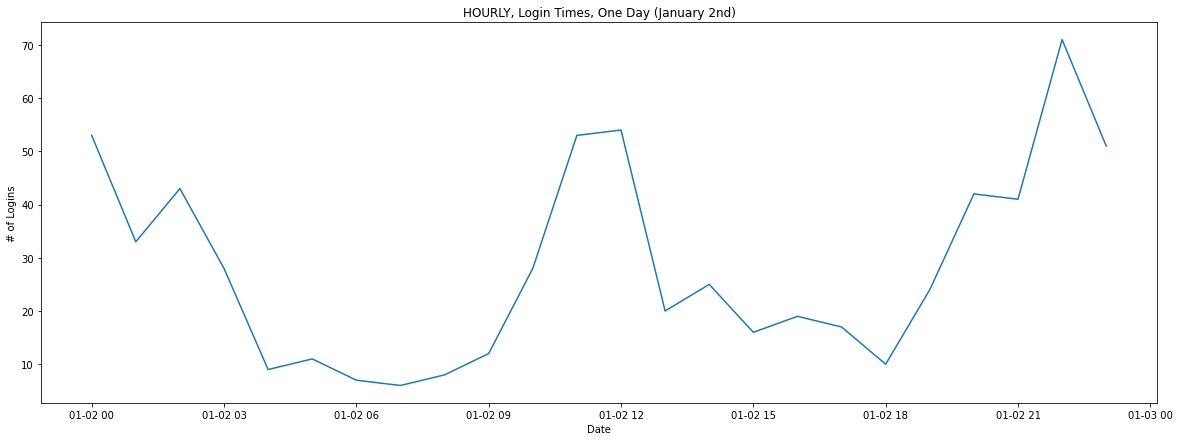

In [103]:
plt.figure(figsize=(20,7))
plt.plot(data_agg1h.loc['1970-1-2':'1970-1-2'].index, data_agg1h.loc['1970-1-2':'1970-1-2'].login_time)
plt.title('HOURLY, Login Times, One Day (January 2nd)')
plt.xlabel('Date')
plt.ylabel('# of Logins')
plt.show()

## TO DO, make histogram bins per hour/half hour to see what most popular time is
### do separate aggregation for alldays, weekdays, weekends

In [104]:
data['day_of_week'] = data['login_time'].dt.weekday
data['hour'] = data['login_time'].dt.hour
data['day'] = data['login_time'].dt.day
data['weekend'] = (data.day_of_week==5) | (data.day_of_week==6)

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

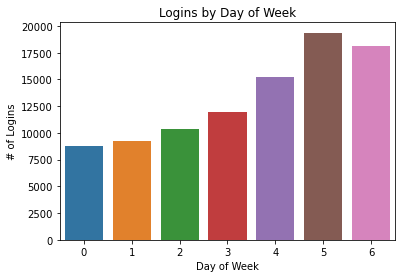

In [106]:
sns.barplot(x= data.day_of_week.value_counts().index, y= data.day_of_week.value_counts().values)

plt.title('Logins by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('# of Logins')

plt.show()

### Observation: Grouped by data of week, saturdays have the most logins followed by sunday.

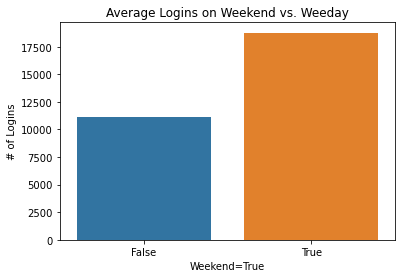

In [107]:
sns.barplot(x= data.weekend.value_counts().index, y= [data.weekend.value_counts()[0] / 5 , data.weekend.value_counts()[1] / 2])

plt.title('Average Logins on Weekend vs. Weeday')
plt.xlabel('Weekend=True')
plt.ylabel('# of Logins')


plt.show()

### Observation: Comparing average logins by day on weekdays vs. weekends, weekends have almost almost double the number of logins per day.

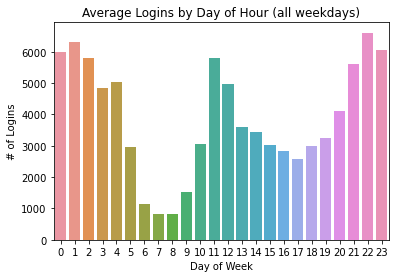

In [108]:
sns.barplot(x= data.hour.value_counts().index, y= data.hour.value_counts().values)

plt.title('Average Logins by Day of Hour (all weekdays)')
plt.xlabel('Day of Week')
plt.ylabel('# of Logins')

plt.show()

### Observation: Analyzing logins aggegrated by hour for the entire week, logins are high from 9pm-4am, with another peak from 11am-12pm.


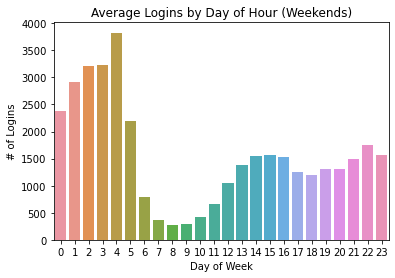

In [109]:
sns.barplot(x= data[data.weekend == 1].hour.value_counts().index, y= data[data.weekend == 1].hour.value_counts().values)

plt.title('Average Logins by Day of Hour (Weekends)')
plt.xlabel('Day of Week')
plt.ylabel('# of Logins')

plt.show()

### Observation: Aggegrating by hour on weekdays, there is not a peak around noon, and a more pronounced peak from 12am-4am.

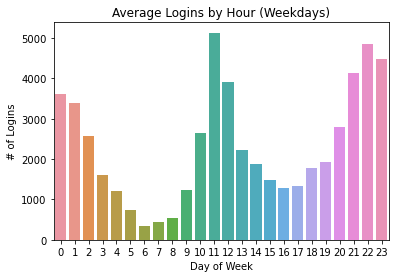

In [110]:
sns.barplot(x= data[data.weekend == 0].hour.value_counts().index, y= data[data.weekend == 0].hour.value_counts().values)

plt.title('Average Logins by Hour (Weekdays)')
plt.xlabel('Day of Week')
plt.ylabel('# of Logins')

plt.show()

### Observation: Analyzing logins aggegrated by hour on weekdays, logins peak from 11am-12pm and a less pronounced peak from 9pm-1am.
___

___
# Part 2: Gotham v. Metropolis Bridge Toll Analysis

### 1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

Problem:

    - drivers limited by bridge toll, 
    - which reducing rides and revenue by this toll
    
Solution:

    - company pays for toll
    - drivers incentized to cross increases revenue

Metric of Sucess:

    Tier 1: increased revenue exceeds toll costs

    Tier 2:revenue increased exceeds toll costs by 2%

### 2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. 

##### a. how you will implement the experiment?

I would implement an experiment conducting a Two Sample Hypothesis Test (A/B Testing). One control group of drivers would continue to drive without a bridge stipend. The other control group who be give a stipend to be reimbursed for the bridge toll. The drivers would be randomly selected from both cities.


I would implement two iterations of this experiment:

- One iteration with a Null hypothesis stating that drivers with the stipend would not increase their revenue above the cost of the bridge tolls by a statistically significant amount. 

- A second iteration with a Null Hypothesis drivers with a bridge stipend would not increase their revenue 2% above the cost of the bridge tolls by a statistically significant amount.

    
##### b. what statistical test(s) you will conduct to verify the significance of the observation?

- I would evaluate the results of this experiment by calculating P-Value for a Two Sample Hypothesis Test to determine if the differences between the samples is statistically significant. I would use the standard P-Value of 0.05 for statistical significance as a baseline, as stakeholders would want confidence in this decision to increase expendures.  

##### c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

- If statistical significance was determined for 2% revenues above toll costs, I would strongly recommend implementing a voucher for toll crossing during off-peak hours for the respective city.  

- If statistical significance was determined only by breaking even at toll costs, I would tentative recommend implementing a voucher for toll crossing during off-peak hours for the respective city. However, this recommendation would take into account that this voucher could increase driver and customer satisfaction.

- Another consideration is that the company could additional reduce costs to rides and investigate at what level rideship could be increased at the most profitable margin.
___

___
## Part 3 ‑ 'Ulitmate' Rider Retention
### Create a predictive modeling classifier:
 - Predict if a customer is "active" (in the last 30 days) or has churned using customer data.


#### Creating an “active” column with boolean of trip in the preceding 30 days.
 - 'active_last_30' will be the target feature for this predictive model.

In [114]:
data2.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


In [115]:
data2.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [116]:
# converting "signup_date" column to datetime

data2.signup_date = pd.to_datetime(data2.signup_date)

# converting "last_trip_date" column to datetime

data2.last_trip_date = pd.to_datetime(data2.last_trip_date)

In [117]:
# Creating columns for count of days since last trip and days since sign up

data2['days_since_last_trip'] = (pd.to_datetime('2014-07-01') - data2.last_trip_date).dt.total_seconds() / (60*60*24)
data2['days_since_signup'] = (pd.to_datetime('2014-07-01') - data2.signup_date).dt.total_seconds() / (60*60*24)

In [118]:
data2.last_trip_date.max() 

Timestamp('2014-07-01 00:00:00')

In [119]:
# Creating boolean mask to filter for trips in the last month

data2['active_last_30'] = data2.last_trip_date > '2014-06'

In [120]:
data2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_trip,days_since_signup,active_last_30
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,14.0,157.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,57.0,153.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,175.0,176.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2.0,172.0,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,108.0,155.0,False


### Building classifier to predict if a customer is active (not churned)


In [121]:
data2 = pd.get_dummies(data2, columns = ['city','phone', 'ultimate_black_user', 'active_last_30'], drop_first = True)

In [122]:
data2.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_trip,days_since_signup,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True,active_last_30_True
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,46.2,3.67,5.0,14.0,157.0,1,0,1,1,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,50.0,8.26,5.0,57.0,153.0,0,0,0,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,100.0,0.77,5.0,175.0,176.0,0,0,1,0,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,80.0,2.36,4.9,2.0,172.0,1,0,1,1,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,82.4,3.13,4.9,108.0,155.0,0,1,0,0,0


# Analyzing Probability Density Functions of Explantory Features

In [123]:
# filtering for numeric columns
numeric_df = data2._get_numeric_data()

In [124]:
numeric_df.shape

(50000, 14)

In [125]:
numeric_df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_trip,days_since_signup,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True,active_last_30_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,14.0,157.0,1,0,1,1,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,57.0,153.0,0,0,0,0,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,175.0,176.0,0,0,1,0,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,2.0,172.0,1,0,1,1,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,108.0,155.0,0,1,0,0,0


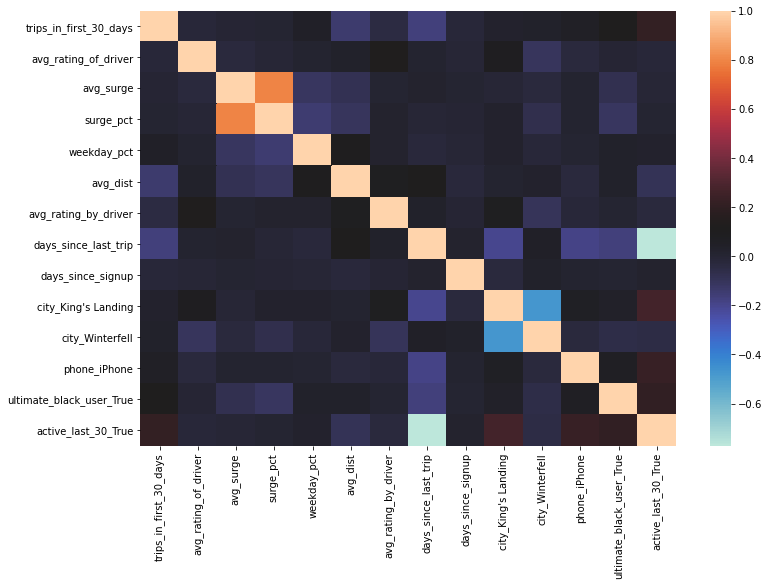

In [126]:
# correlation matrix of numeric features:

# Heatmap of Correlation Matrix

plt.figure(figsize=(12,8))

sns.heatmap(numeric_df.corr(),cmap='icefire')

plt.show()

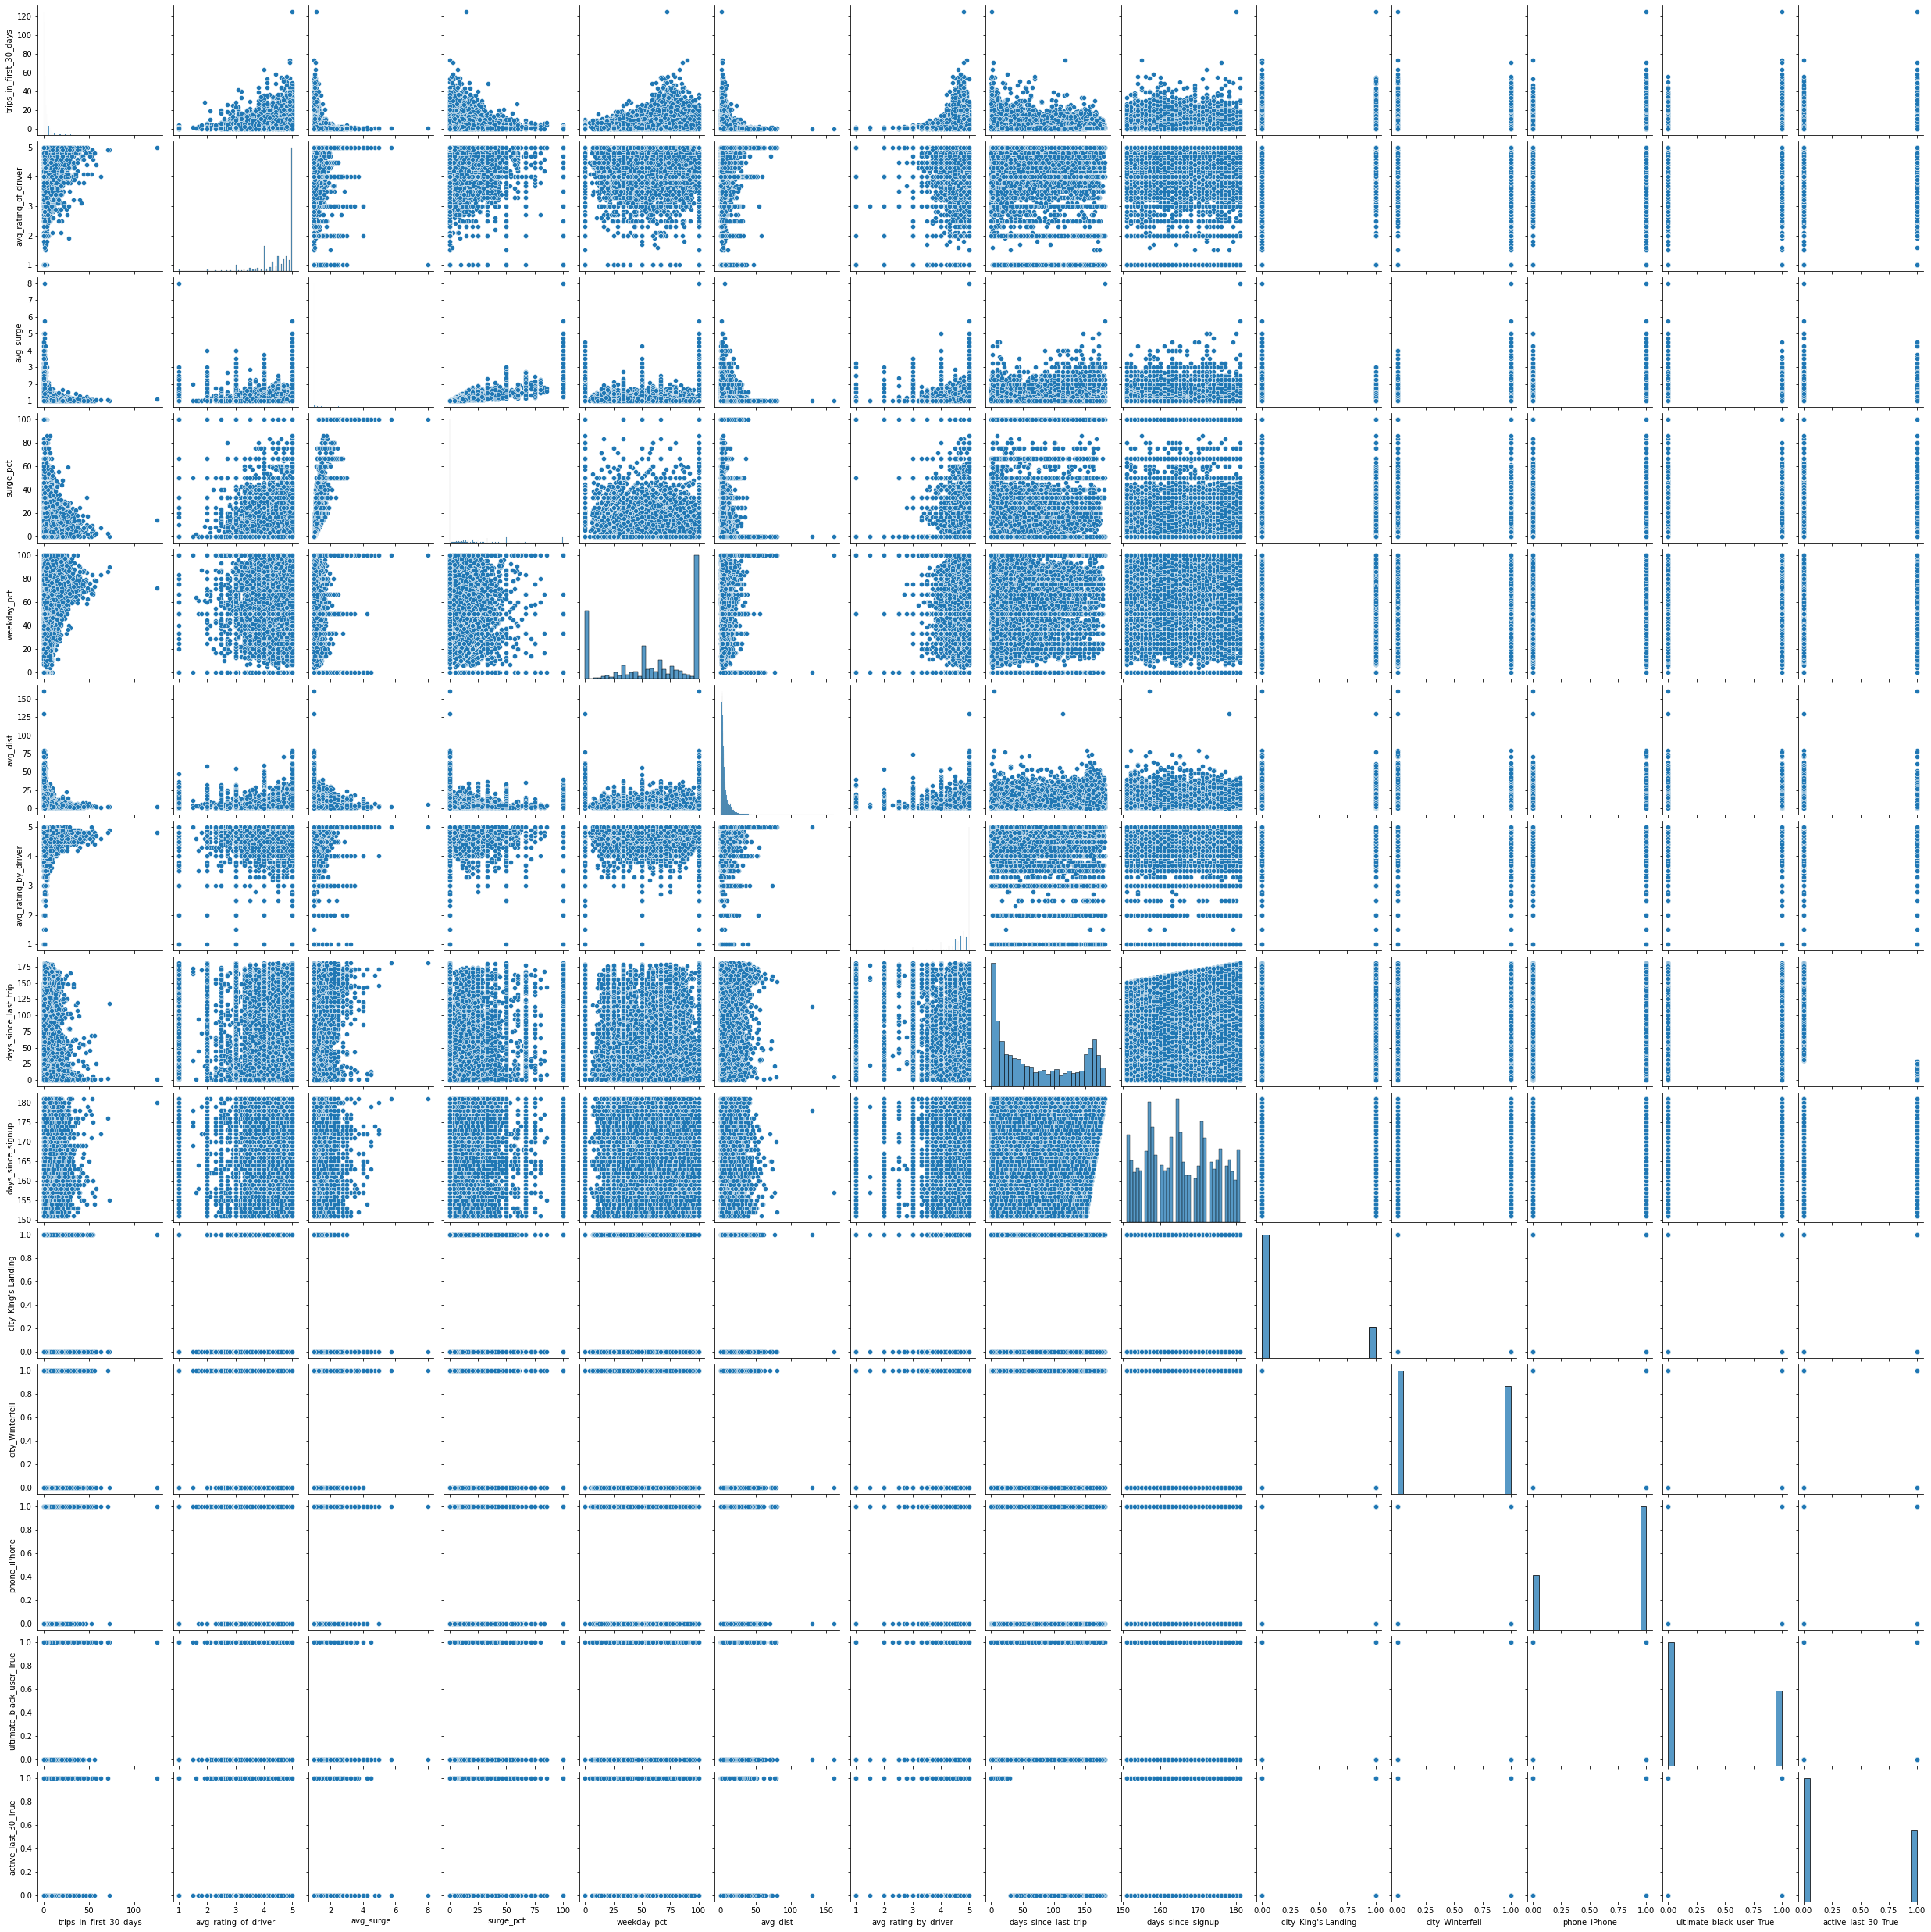

In [127]:
# Scatter Matrix of Numeric Features
sns.pairplot(numeric_df)

plt.show()

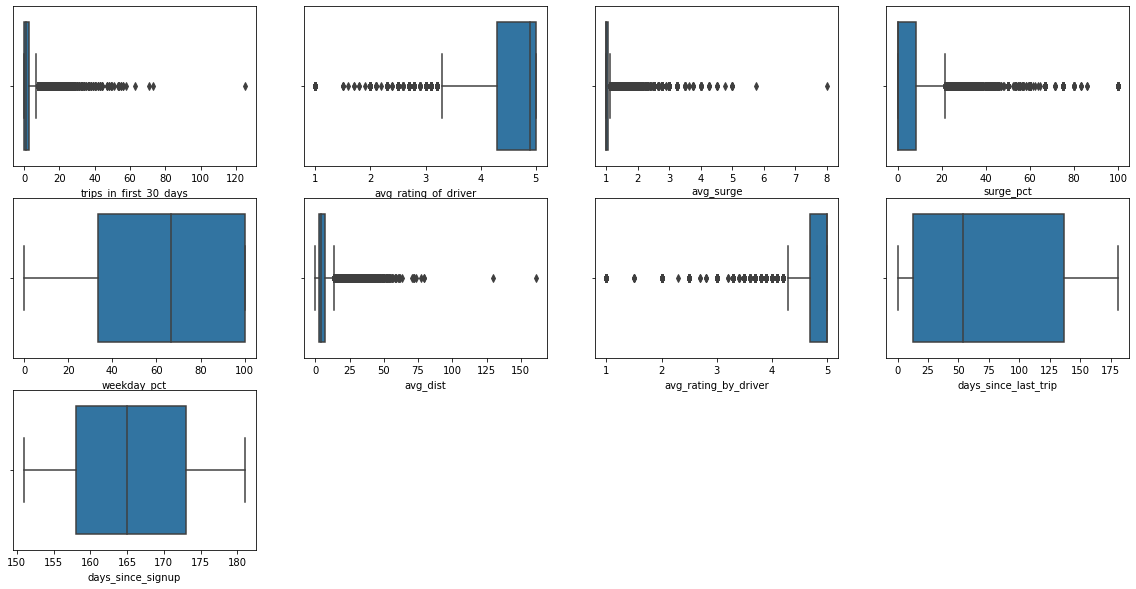

In [128]:
plt.figure(figsize=(20,10))

for i in range(9):
    plt.subplot(3,4,i+1)
    sns.boxplot(x = numeric_df.iloc[:,i])

plt.show()    
# plt.savefig('boxplot_16.png')

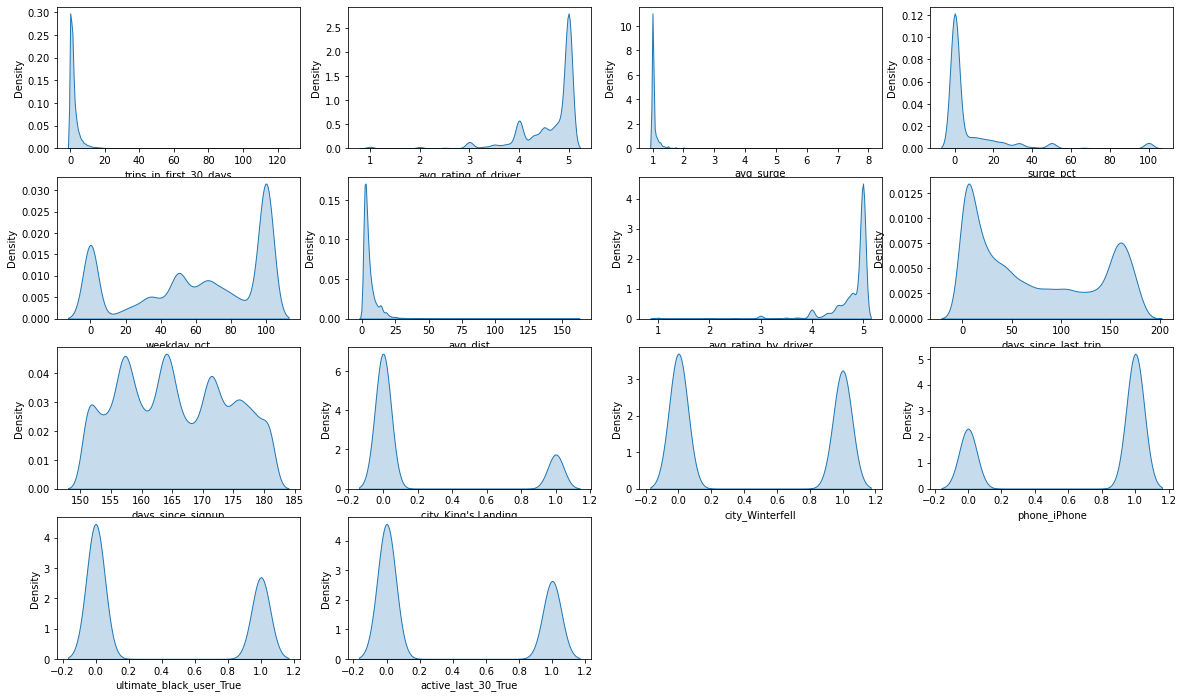

In [129]:
#  plotting PDFs for numeric columns

plt.figure(figsize=(20,12))

for i in range(14):
    plt.subplot(4,4,i+1)
    sns.kdeplot(data=numeric_df.iloc[:,i], shade=True)

plt.show()
# plt.savefig('kdeplot_16.png') 

### Using Sklearn's Power Transformer to make Box-Cox Transformation and Normalize/Standardize the Distributions of the Numeric Features.

In [130]:
numeric_df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_trip,days_since_signup,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True,active_last_30_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,14.0,157.0,1,0,1,1,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,57.0,153.0,0,0,0,0,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,175.0,176.0,0,0,1,0,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,2.0,172.0,1,0,1,1,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,108.0,155.0,0,1,0,0,0


In [131]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

numeric_df_no_target = numeric_df.drop(columns=['active_last_30_True'])
processed_data = pt.fit_transform(numeric_df_no_target)

In [132]:
data2[numeric_df_no_target.columns] = processed_data

In [133]:
data2.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_trip,days_since_signup,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True,active_last_30_True
0,1.073802,2014-01-25,-0.172239,1.288395,2014-06-17,1.494799,-0.242743,-0.137757,0.767263,-0.870726,-0.964959,1.983894,-0.935515,0.667712,1.285285,1
1,-1.268787,2014-01-29,0.853949,-0.612102,2014-05-05,-0.668976,-0.147708,0.892766,0.767263,0.104054,-1.460613,-0.504059,-0.935515,-1.497652,-0.778038,0
2,0.837894,2014-01-06,-1.032931,-0.612102,2014-01-07,-0.668976,0.972266,-2.016962,0.767263,1.317191,1.191925,-0.504059,-0.935515,0.667712,-0.778038,0
3,1.676814,2014-01-10,-0.433537,1.606214,2014-06-29,1.539002,0.547680,-0.714694,0.074874,-1.574024,0.762696,1.983894,-0.935515,0.667712,1.285285,1
4,1.954231,2014-01-27,-0.860344,1.845120,2014-03-15,1.440465,0.599995,-0.346410,0.074874,0.737008,-1.210797,-0.504059,1.068930,-1.497652,-0.778038,0


## Checking for null Values

In [134]:
data2.isnull().sum()

trips_in_first_30_days         0
signup_date                    0
avg_rating_of_driver        8122
avg_surge                      0
last_trip_date                 0
surge_pct                      0
weekday_pct                    0
avg_dist                       0
avg_rating_by_driver         201
days_since_last_trip           0
days_since_signup              0
city_King's Landing            0
city_Winterfell                0
phone_iPhone                   0
ultimate_black_user_True       0
active_last_30_True            0
dtype: int64

In [135]:
# dropping null values the driver rating seems pretty important to the prediction and do not want to incorrectly
# impute this information, still over 40,000 rows left in the dataset

data2 = data2.dropna()

In [136]:
data2.isnull().sum()

trips_in_first_30_days      0
signup_date                 0
avg_rating_of_driver        0
avg_surge                   0
last_trip_date              0
surge_pct                   0
weekday_pct                 0
avg_dist                    0
avg_rating_by_driver        0
days_since_last_trip        0
days_since_signup           0
city_King's Landing         0
city_Winterfell             0
phone_iPhone                0
ultimate_black_user_True    0
active_last_30_True         0
dtype: int64

In [137]:
data2.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_trip,days_since_signup,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True,active_last_30_True
0,1.073802,2014-01-25,-0.172239,1.288395,2014-06-17,1.494799,-0.242743,-0.137757,0.767263,-0.870726,-0.964959,1.983894,-0.935515,0.667712,1.285285,1
1,-1.268787,2014-01-29,0.853949,-0.612102,2014-05-05,-0.668976,-0.147708,0.892766,0.767263,0.104054,-1.460613,-0.504059,-0.935515,-1.497652,-0.778038,0
2,0.837894,2014-01-06,-1.032931,-0.612102,2014-01-07,-0.668976,0.972266,-2.016962,0.767263,1.317191,1.191925,-0.504059,-0.935515,0.667712,-0.778038,0
3,1.676814,2014-01-10,-0.433537,1.606214,2014-06-29,1.539002,0.547680,-0.714694,0.074874,-1.574024,0.762696,1.983894,-0.935515,0.667712,1.285285,1
4,1.954231,2014-01-27,-0.860344,1.845120,2014-03-15,1.440465,0.599995,-0.346410,0.074874,0.737008,-1.210797,-0.504059,1.068930,-1.497652,-0.778038,0


In [138]:
data2.tail(10)

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_trip,days_since_signup,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True,active_last_30_True
49987,0.837894,2014-01-27,-0.433537,-0.612102,2014-05-31,-0.668976,0.547680,0.050873,-1.988707,-0.380147,-1.210797,-0.504059,1.068930,0.667712,-0.778038,0
49988,-0.058620,2014-01-20,-0.661666,-0.612102,2014-06-14,-0.668976,-0.147708,-0.624496,0.767263,-0.763969,-0.367039,1.983894,-0.935515,0.667712,-0.778038,1
49990,-0.058620,2014-01-13,-0.172239,1.064836,2014-05-18,1.604055,-0.582247,-0.245649,0.767263,-0.114609,0.432537,-0.504059,-0.935515,0.667712,1.285285,0
49991,-1.268787,2014-01-08,0.853949,2.001236,2014-06-29,1.681005,-1.772757,-1.685509,0.767263,-1.574024,0.978846,-0.504059,1.068930,0.667712,-0.778038,1
49992,-0.058620,2014-01-18,-2.021920,-0.612102,2014-01-19,-0.668976,-1.772757,0.788224,0.767263,1.225623,-0.134265,1.983894,-0.935515,0.667712,-0.778038,0
49993,0.837894,2014-01-03,0.126341,1.382089,2014-07-01,1.426513,-0.011019,-0.624496,-0.872639,-1.874805,1.505956,-0.504059,-0.935515,0.667712,1.285285,1
49994,-0.058620,2014-01-03,-0.433537,2.151447,2014-05-31,1.615910,-0.818869,-0.776288,-1.429314,-0.380147,1.505956,-0.504059,-0.935515,0.667712,-0.778038,0
49995,-1.268787,2014-01-25,0.853949,-0.612102,2014-06-05,-0.668976,0.972266,0.416420,-1.853779,-0.501406,-0.964959,1.983894,-0.935515,0.667712,-0.778038,1
49997,-1.268787,2014-01-31,0.853949,-0.612102,2014-05-22,-0.668976,0.972266,-0.071692,0.767263,-0.190199,-1.714523,-0.504059,1.068930,-1.497652,1.285285,0
49998,0.498120,2014-01-14,-1.934281,-0.612102,2014-01-15,-0.668976,0.972266,0.151107,-2.113284,1.256622,0.320860,-0.504059,-0.935515,0.667712,-0.778038,0


# Building Classifier Model
-  Find factors for the best predictors for retention (strongest model coefficients)

- Offer suggestions to operationalize those insights to help Ultimate.

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from  sklearn.linear_model import LogisticRegression

In [140]:
# Splitting Data

# dropping 'days_since_last_trip' as it contains the boolean truth of if the customer has churned, perhaps useful for 
# other purposes.

X = data2.drop(columns=['active_last_30_True', 'signup_date', 'last_trip_date', 'days_since_last_trip'])
y = data2.active_last_30_True

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Logistic Regression

In [141]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_preds= lr.predict(X_test)

In [142]:
print(classification_report(y_test, lr_preds))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80      5027
           1       0.72      0.60      0.65      3322

    accuracy                           0.75      8349
   macro avg       0.74      0.72      0.73      8349
weighted avg       0.74      0.75      0.74      8349



In [143]:
lr.coef_

array([[ 0.06418384, -0.10176524, -0.82007269,  1.25139329,  0.12856806,
         0.03429503, -0.3972461 ,  0.03417099,  0.73372962,  0.27353915,
         0.51193362,  0.462131  ]])

## K-Nearest Neighbors Classifier

In [144]:
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train, y_train)

knn_preds = knn.predict(X_test)

In [145]:
print(classification_report(y_test, knn_preds))

              precision    recall  f1-score   support

           0       0.71      0.88      0.79      5027
           1       0.72      0.47      0.57      3322

    accuracy                           0.72      8349
   macro avg       0.72      0.67      0.68      8349
weighted avg       0.72      0.72      0.70      8349



In [146]:
knn.classes_

array([0, 1], dtype=uint8)

## Decision Tree Classifier

In [147]:
tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [148]:
tree.fit(X_train, y_train)
tree_preds = tree.predict(X_test)

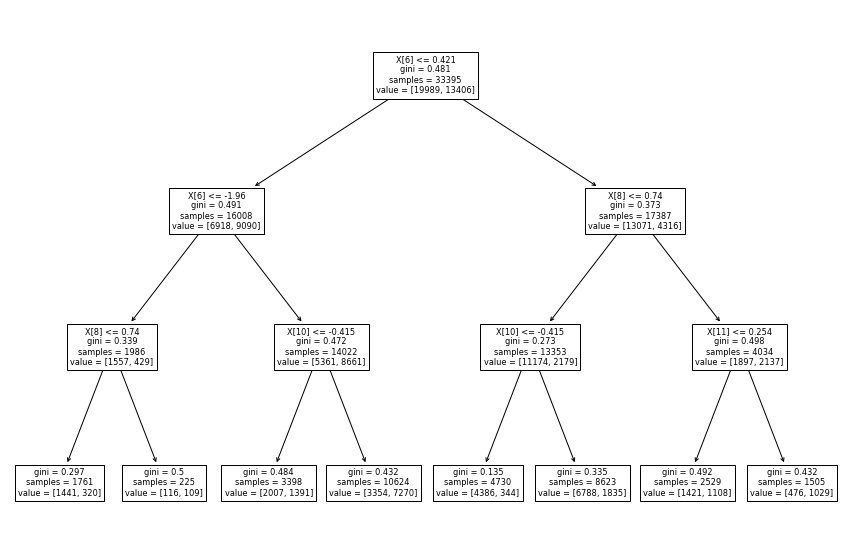

In [149]:
plt.figure(figsize=(15,10))
plot_tree(tree)
plt.show()

In [150]:
print(classification_report(y_test, tree_preds))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79      5027
           1       0.69      0.61      0.65      3322

    accuracy                           0.73      8349
   macro avg       0.72      0.71      0.72      8349
weighted avg       0.73      0.73      0.73      8349



In [151]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.60276502, 0.        , 0.23139112, 0.        ,
       0.13553925, 0.03030461])

## XGBOOST 

In [152]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [153]:
xgb = xgb.XGBClassifier()

xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [154]:
xgb_preds = xgb.predict(X_test)

In [155]:
print(classification_report(y_test, xgb_preds))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      5027
           1       0.74      0.70      0.72      3322

    accuracy                           0.78      8349
   macro avg       0.77      0.77      0.77      8349
weighted avg       0.78      0.78      0.78      8349



## Analysis of Model Coefficients

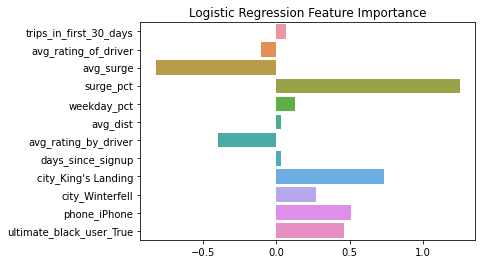

In [156]:
sns.barplot(y=X_test.columns, x=lr.coef_[0])
plt.title('Logistic Regression Feature Importance')
plt.show()

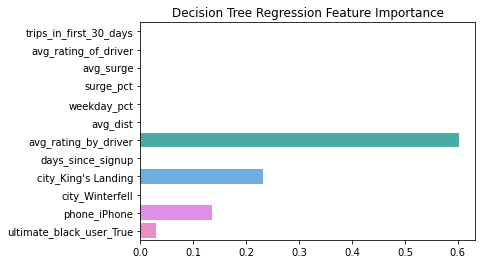

In [157]:
sns.barplot(y=X_test.columns, x=tree.feature_importances_)
plt.title('Decision Tree Regression Feature Importance')

plt.show()

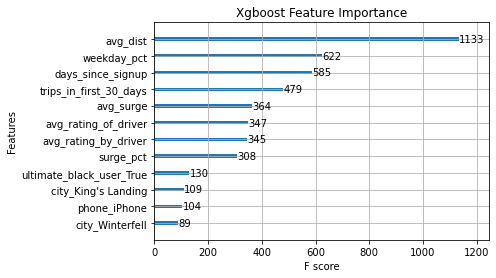

In [158]:
from xgboost import plot_importance

plot_importance(xgb)
plt.title('Xgboost Feature Importance')

plt.show()

## Business Implications / Recommendations

- The feature importance of the Xgboost model would suggest that rides with a longer "avg_dist" have higher retention followed by users who ride more frequently on weekdays.

- The decision tree model highlighted that the average rating given to drivers had the strongest impact in retaining customers, suggesting that customer servicea and good drivers is very important. Additionnaly iphone users and rides orginating from King's Landing are more long term customers.

- The logistic regression model's coefficients suggest that the most impactful feature for retention is the rider's "surge_pct", followed by "iphone" and  "ulitmate_black" users, which can be intrepreted as meaning that iphone black level users who rider during surge pricing hours are the most predictive features for customer retention.